In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取球队统计数据

In [7]:
team_stats_df = pd.read_csv('./data/team.csv')

In [8]:
team_stats_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Toronto Raptors,24,242.1,37.7,84.8,0.444,11.9,34.5,0.346,...,0.830,8.3,34.0,42.3,22.5,8.0,4.6,12.0,22.6,106.6
1,2,Golden State Warriors,22,242.3,41.1,86.1,0.477,12.2,32.7,0.372,...,0.813,10.1,33.2,43.3,28.4,7.4,5.7,14.9,23.2,114.1
2,3,Portland Trail Blazers,16,247.8,39.4,90.4,0.436,11.8,32.8,0.360,...,0.766,11.4,33.8,45.3,19.8,6.8,5.2,12.9,22.8,109.7
3,4,Milwaukee Bucks,15,243.3,39.8,88.4,0.450,12.8,38.1,0.336,...,0.729,10.1,41.8,51.9,25.0,6.7,6.4,12.9,21.8,112.8
4,5,Denver Nuggets,14,247.1,39.9,90.3,0.442,9.6,27.8,0.344,...,0.782,13.1,34.6,47.7,24.0,5.7,4.6,9.7,21.3,109.1


# 读取对手的数据

In [9]:
team_opp_stats_df = pd.read_csv('./data/peer.csv')

In [11]:
team_opp_stats_df.columns = ['RK','Team','G'] + \
['opp' + x for x in team_opp_stats_df.columns[3:]]

In [12]:
mergedf = pd.merge(team_stats_df,team_opp_stats_df,on=['Team'])

In [14]:
mergedf.head()

,Rk,Team,G_x,MP,FG,FGA,FG%,3P,3PA,3P%,...,oppFT%,oppORB,oppDRB,oppTRB,oppAST,oppSTL,oppBLK,oppTOV,oppPF,oppPTS
0,1,Toronto Raptors,24,242.1,37.7,84.8,0.444,11.9,34.5,0.346,...,0.775,9.8,35.5,45.3,23.6,6.5,5.0,15.4,21.8,101.1
1,2,Golden State Warriors,22,242.3,41.1,86.1,0.477,12.2,32.7,0.372,...,0.810,10.1,30.8,41.0,22.5,7.8,3.9,14.7,22.3,110.8
2,3,Portland Trail Blazers,16,247.8,39.4,90.4,0.436,11.8,32.8,0.360,...,0.796,12.9,35.4,48.3,24.0,7.3,5.9,12.9,22.8,111.1
3,4,Milwaukee Bucks,15,243.3,39.8,88.4,0.450,12.8,38.1,0.336,...,0.802,8.5,36.7,45.2,22.6,6.9,4.8,12.1,23.3,104.0
4,5,Denver Nuggets,14,247.1,39.9,90.3,0.442,9.6,27.8,0.344,...,0.759,11.6,34.8,46.4,20.0,5.3,4.8,9.6,21.9,107.3


# 柱状图分析球队均得失分

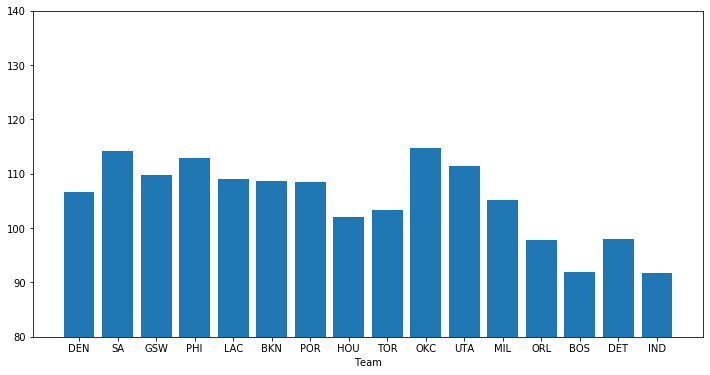

In [25]:
pts = np.array(mergedf[['PTS', 'oppPTS']].values.tolist())
index = np.arange(pts.shape[0])
plt.bar(index, pts[:, 0])
team_name = [
    'DEN', 'SA', 'GSW', 'PHI', 'LAC', 'BKN', 'POR', 'HOU', 'TOR', 'OKC', 'UTA',
    'MIL', 'ORL', 'BOS', 'DET', 'IND'
]
plt.xlabel('Score')
plt.xlabel('Team')
plt.yticks(np.arange(80, 141, 10))
plt.xticks(index, team_name)
plt.ylim(80, 140)
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.show()

# 球队得失分

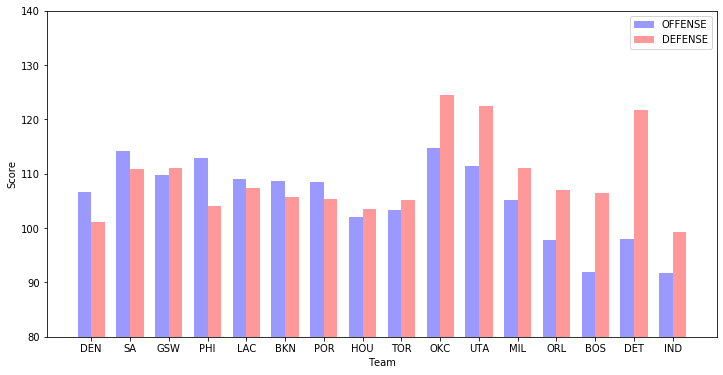

In [33]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
rects1 = ax.bar(index,
                pts[:, 0],
                bar_width,
                alpha=opacity,
                color='b',
                label='OFFENSE')
rects2 = ax.bar(index + bar_width,
                pts[:, 1],
                bar_width,
                alpha=opacity,
                color='r',
                label='DEFENSE')

ax.set_xlabel('Team')
ax.set_ylabel('Score')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks(np.arange(80, 141, 10))
ax.set_ylim(80,140)
ax.set_xticklabels(team_name)

ax.legend()
plt.show()

# 使用散点图分析球队均得失分

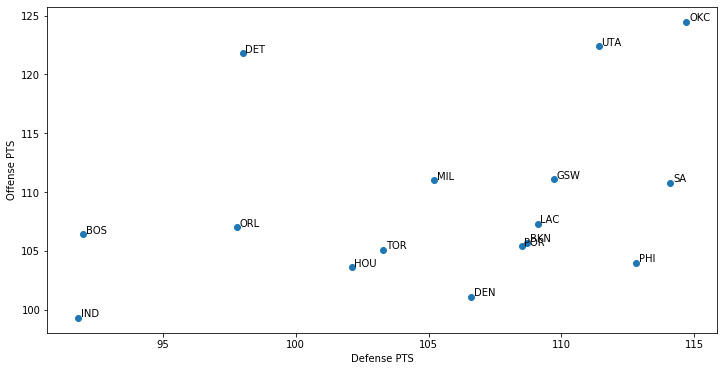

In [39]:
plt.scatter(pts[:,0],pts[:,1])
plt.ylabel('Offense PTS')
plt.xlabel('Defense PTS')
for i in range(len(pts[:,0])):
    plt.annotate(team_name[i],xy=(pts[i,0],pts[i,1]),xytext=(pts[i,0] + 0.1,pts[i,1]+0.1))
    
plt.show()